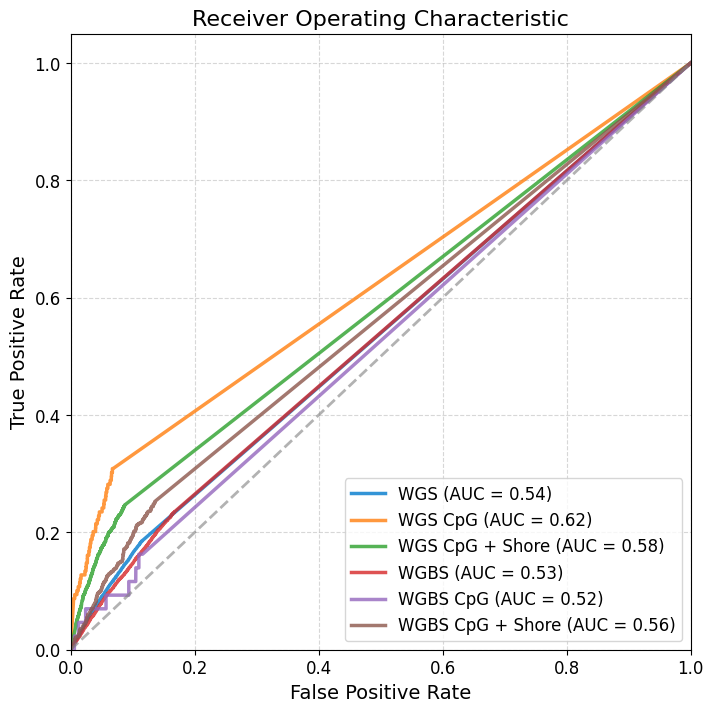

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from itertools import cycle

def read_data(file_path):
    data = np.genfromtxt(file_path, delimiter='\t', dtype=str, usecols=(2, 3))
    processed_data = np.vectorize(lambda x: float(x.strip('[]')))(data)
    return processed_data

def plot_roc_curve(y_true, y_score, label, color):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(
        fpr, tpr,
        label=f'{label} (AUC = {roc_auc:.2f})',
        color=color,
        alpha=0.8,
        linestyle='-',
        linewidth=2.5
    )

file_paths = ['/jet/home/rbandaru/ocean_rbandaru/FRAGMA/HD4546_WGS_PREDICTIONS.bed', '/jet/home/rbandaru/ocean_rbandaru/FRAGMA/HD4546_WGS_PREDICTIONS_CPG.bed', '/jet/home/rbandaru/ocean_rbandaru/FRAGMA/HD4546_WGS_PREDICTIONS_CPG_SHORE.bed', '/jet/home/rbandaru/ocean_rbandaru/FRAGMA/HD4546_WGBS_PREDICTIONS.bed', '/jet/home/rbandaru/ocean_rbandaru/FRAGMA/HD4546_WGBS_PREDICTIONS_CPG.bed', '/jet/home/rbandaru/ocean_rbandaru/FRAGMA/HD4546_WGBS_PREDICTIONS_CPG_SHORE.bed']
colors = ['#007ACC', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B']
plt.figure(figsize=(8, 8))
labels = ["WGS", "WGS CpG", "WGS CpG + Shore", "WGBS", "WGBS CpG", "WGBS CpG + Shore"]

for file_path, color, label in zip(file_paths, colors, labels):
    data = read_data(file_path)
    predictions = data[:, 0]
    true_labels = data[:, 1]
    plot_roc_curve(
        true_labels,
        predictions,
        label=f'{label}',
        color=color
    )

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', alpha=0.6)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5) 
plt.tick_params(axis='both', which='major', labelsize=12)


plt.show()
